## **Data Visualization**

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

### Load The Dataset


In [2]:
df_origin = pd.read_csv('../data/ireland-news-headlines.csv')
df = df_origin.copy()

### Analayze The Dataset

Arrangement of the DataFrame.

In [3]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['year'] = df['publish_date'].dt.year
# df['month'] = df['publish_date'].dt.month
# df['day'] = df['publish_date'].dt.day
df.drop('publish_date', axis=1, inplace=True)
print(df.shape)
print(df.head())

(1611495, 3)
  headline_category                                    headline_text  year
0              news         UUP sees possibility of voting Major out  1996
1              news   Pubs targeted as curbs on smoking are extended  1996
2              news  Papers reveal secret links with O'Neill cabinet  1996
3              news      Domestic chaos as Italy takes EU presidency  1996
4              news     Learning about the star to which we owe life  1996


#### Erase duplicated rows and nan cells

In [4]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 76264


In [5]:
df.drop_duplicates(inplace=True)
df = df.dropna() 
df = df.reset_index()
df = df.iloc[:,1:]
print(df.shape)

(1535225, 3)


#### Visualization

Split the headline category to 4 levels

In [6]:
df[['headline_category', 'headline_category_2', 'headline_category_3', 'headline_category_4']] = df['headline_category'].str.split('.', expand=True)
Num_pri_classes = len(df['headline_category'].unique())
print(f'Number of primary classes: {Num_pri_classes}')
Names_pri_classes = df['headline_category'].unique()
print(f'The classes are: {Names_pri_classes}')
Num_all_classes = len(df_origin['headline_category'].unique())
print(f'Number of all the classes: {Num_all_classes}')

Number of primary classes: 6
The classes are: ['news' 'culture' 'opinion' 'business' 'sport' 'lifestyle']
Number of all the classes: 103


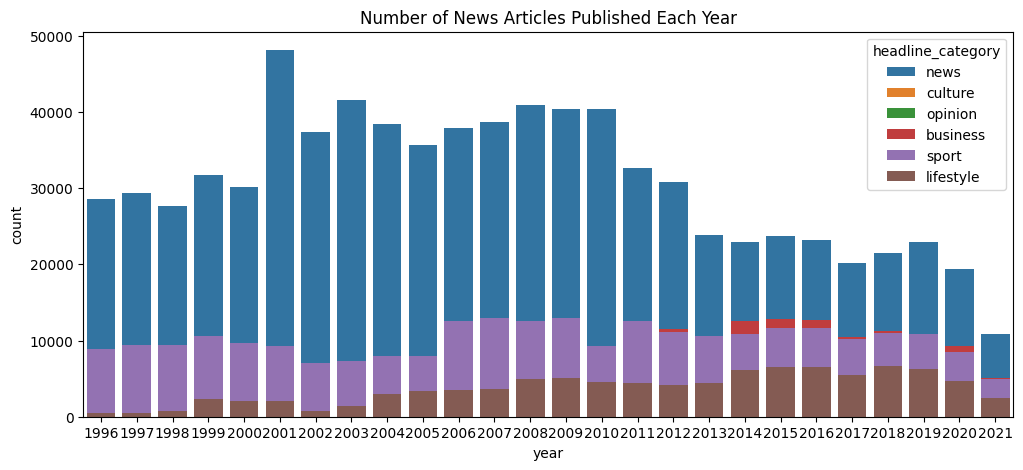

In [31]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='year',hue='headline_category',dodge=False, data=df)
plt.title('Number of News Articles Published Each Year')
plt.show()


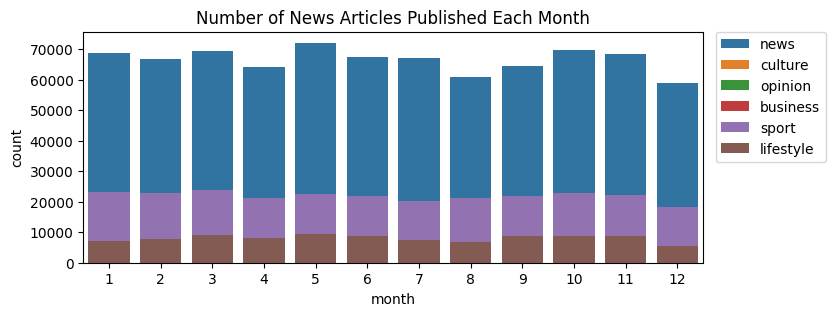

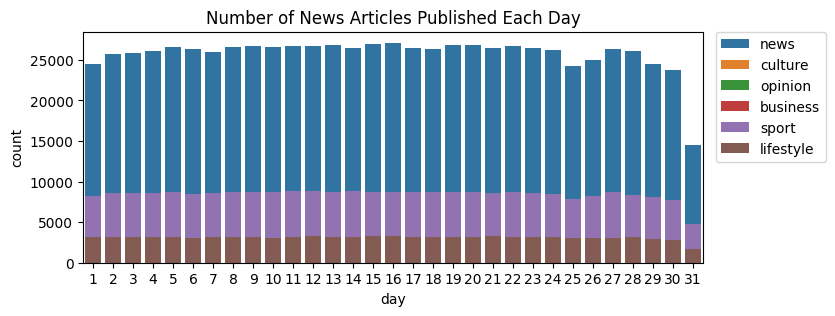

In [32]:
plt.figure(figsize=(8,3))
ax = sns.countplot(x='month',hue='headline_category',dodge=False, data=df)
plt.title('Number of News Articles Published Each Month')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize=(8,3))
ax = sns.countplot(x='day',hue='headline_category',dodge=False, data=df)
plt.title('Number of News Articles Published Each Day')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


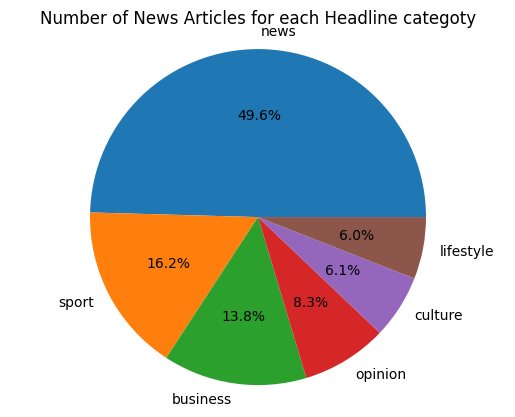

In [29]:
category_counts = df['headline_category'].value_counts()
plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Number of News Articles for each Headline categoty')
# plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

#### Clean The Data

* converting all letters to lower case
* removing numbers
* removing punctuations
* removing stop words
* Inflections of a word

In [9]:
df.insert(2, "clean_headline_text",  None)

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
stemmer= PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for i, text in enumerate(df["headline_text"]):
    clean_text = text.lower() # converting all letters to lower case
    clean_text = re.sub(r'\d+', '', clean_text) # removing numbers
    clean_text = clean_text.translate(str.maketrans("","", string.punctuation)) # removing punctuations
    clean_text = clean_text.strip() # removing whitespaces
    wo_sw = ''
    for word in clean_text.split():
        if word not in stopwords: # removing stop words
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word) # Inflections of a word
            wo_sw += word + ' '
    clean_text = wo_sw 
    
    df["clean_headline_text"][i] = clean_text

/tmp/ipykernel_19375/2296825713.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_headline_text"][i] = clean_text


In [16]:
df

,headline_category,headline_text,clean_headline_text,year,headline_category_2,headline_category_3,headline_category_4
0,news,UUP sees possibility of voting Major out,uup see possibl vote major,1996,None,None,None
1,news,Pubs targeted as curbs on smoking are extended,pub target curb smoke extend,1996,None,None,None
2,news,Papers reveal secret links with O'Neill cabinet,paper reveal secret link oneil cabinet,1996,None,None,None
3,news,Domestic chaos as Italy takes EU presidency,domest chao itali take eu presid,1996,None,None,None
4,news,Learning about the star to which we owe life,learn star owe life,1996,None,None,None
...,...,...,...,...,...,...,...
1535220,news,Reserve members of Defence Forces to be allowe...,reserv member defenc forc allow serv oversea f...,2021,politics,oireachtas,None
1535221,culture,Maureen Dowd: Joe Biden is 'crazy about the Ir...,maureen dowd joe biden crazi irish plan celebr...,2021,None,None,None
1535222,sport,Andy Murray rolls back the years to own Centre...,andi murray roll back year centr court,2021,others,None,None
1535223,news,Delta variant could do 'significant damage' in...,delta variant could signific damag partial vac...,2021,health,None,None


In [14]:
df.to_csv('../data/ireland-news-headlines-cleaned.csv')  

Display of repeated words in the data by title in a word cloud

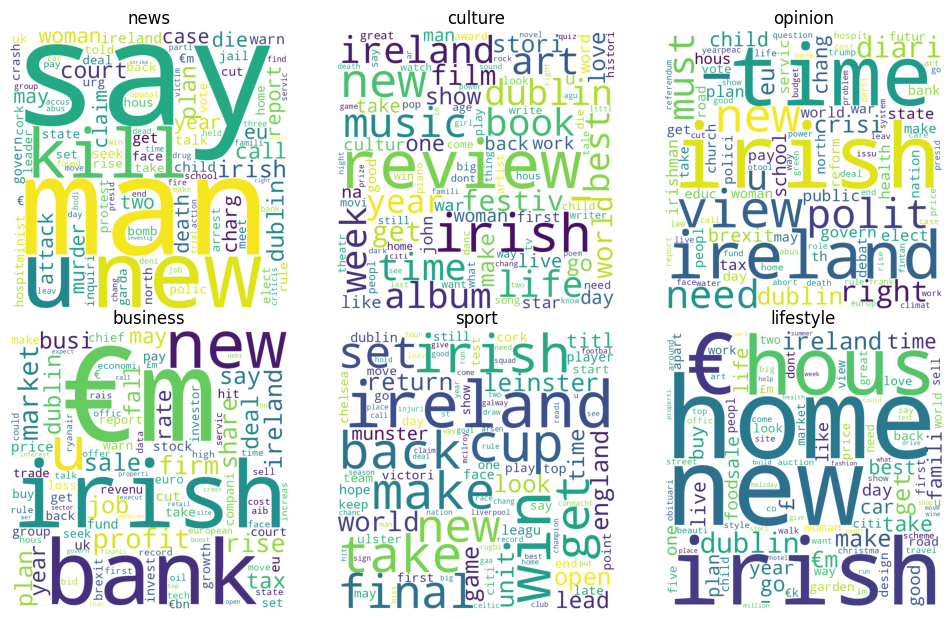

In [19]:
from wordcloud import WordCloud

word_clouds = []
for cat in df['headline_category'].unique():
    
    df3 = df[df['headline_category'] == cat] 
    df3 = df3['clean_headline_text'].astype(str)
    text = ' '.join(df3.tolist())

    word_frequencies = {}
    for word in text.split():
        if word not in word_frequencies:
            word_frequencies[word] = 0
        word_frequencies[word] += 1

    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_frequencies)
    word_clouds.append(wordcloud)
    

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), facecolor=None)
axes[0, 0].imshow(word_clouds[0])
axes[0, 0].set_title('news')
axes[0, 0].axis('off')
axes[0, 1].imshow(word_clouds[1])
axes[0, 1].set_title('culture')
axes[0, 1].axis('off')
axes[0, 2].imshow(word_clouds[2])
axes[0, 2].set_title('opinion')
axes[0, 2].axis('off')
axes[1, 0].imshow(word_clouds[3])
axes[1, 0].set_title('business')
axes[1, 0].axis('off')
axes[1, 1].imshow(word_clouds[4])
axes[1, 1].set_title('sport')
axes[1, 1].axis('off')
axes[1, 2].imshow(word_clouds[5])
axes[1, 2].set_title('lifestyle')
axes[1, 2].axis('off')
plt.tight_layout(pad=0)
    
plt.show()

In [20]:
word_frequencies

{'strong': 156,
 'growth': 87,
 'forecast': 30,
 '£m': 812,
 'offic': 663,
 'deal': 386,
 'may': 448,
 'start': 401,
 'new': 3682,
 'round': 73,
 'develop': 530,
 'unidar': 1,
 'move': 642,
 'way': 955,
 'clear': 118,
 'carpark': 27,
 'contract': 28,
 'sheridan': 10,
 'bank': 236,
 'agre': 47,
 'buy': 1325,
 'block': 301,
 'ifsc': 50,
 '£': 1662,
 'million': 651,
 'irish': 3351,
 'life': 1354,
 'sell': 816,
 'two': 814,
 'store': 207,
 'ilac': 13,
 'press': 53,
 'build': 615,
 'expect': 401,
 'make': 2033,
 'westmoreland': 6,
 'street': 736,
 'last': 459,
 'unit': 188,
 'galway': 293,
 'park': 570,
 'put': 500,
 'market': 812,
 'sought': 213,
 'interior': 196,
 'design': 1038,
 'ashl': 2,
 'hotel': 566,
 'ballsbridg': 161,
 'sold': 379,
 'astonish': 3,
 'chang': 530,
 'sentiment': 12,
 'flurri': 5,
 'activ': 116,
 'among': 111,
 'minnow': 3,
 'compani': 144,
 'warn': 92,
 'overh': 6,
 'level': 102,
 'let': 415,
 'shannon': 41,
 'complex': 104,
 'cabinte': 50,
 'royal': 114,
 'liver': 1

#### Models

##### t-SNE

In [10]:
# t-SNE
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.manifold import TSNE

# # Create a TF-IDF vectorizer object
# vectorizer = TfidfVectorizer()

# # Convert article titles to TF-IDF vectors
# tfidf_vectors = vectorizer.fit_transform(df2['headline_text'])

# # Perform t-SNE on the TF-IDF vectors to reduce their dimensionality to 2D
# tsne = TSNE(n_components=2, random_state=42, init="random")
# tsne_vectors = tsne.fit_transform(tfidf_vectors)

# # Plot the 2D t-SNE vectors
# plt.figure(figsize=(10, 10))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], marker='.')
# plt.title('t-SNE Visualization of Article Titles')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()

##### LDA